In [1]:
import os 
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop , Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


In [ ]:
TRAINING_DIR = "sorted_data/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=32,class_mode='categorical',target_size=(256, 256))

VALIDATION_DIR = "sorted_data/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,batch_size=32,class_mode='categorical',target_size=(256, 256))

Found 61578 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['acc'])

c:\Users\kaush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = model.fit(train_generator, epochs=40, steps_per_epoch=38,validation_data=validation_generator, validation_steps=9)

Epoch 1/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - acc: 0.5408 - loss: 1.1920 - val_acc: 0.6528 - val_loss: 0.8605
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.6514 - loss: 0.6468 - val_acc: 0.6389 - val_loss: 0.7844
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.6366 - loss: 0.6649 - val_acc: 0.6806 - val_loss: 0.6817
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.6807 - loss: 0.6011 - val_acc: 0.6354 - val_loss: 0.6954
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.6368 - loss: 0.6588 - val_acc: 0.6285 - val_loss: 0.6607
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.6585 - loss: 0.6271 - val_acc: 0.6632 - val_loss: 0.6553
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.6477 - loss: 0.6344 - val_acc: 0.6736 - val_loss: 0.7281
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.6606 - loss: 0.6201 - val_acc: 0.5972 - val_loss: 0.6891
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - acc: 0.6734 - loss: 

In [26]:
import numpy as np
from keras.preprocessing import image

test1 = image.load_img("elliptical.jpg", target_size=(150, 150))  # Added comma after "spira.jpg"
test1 = image.img_to_array(test1)
test1 = np.expand_dims(test1, axis=0)
result2 = model.predict(test1)



ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_20" is incompatible with the layer: expected axis -1 of input shape to have value 115200, but received input with shape (1, 36992)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150, 3), dtype=float32)
  • training=False
  • mask=None

385/385 ━━━━━━━━━━━━━━━━━━━━ 164s 426ms/step


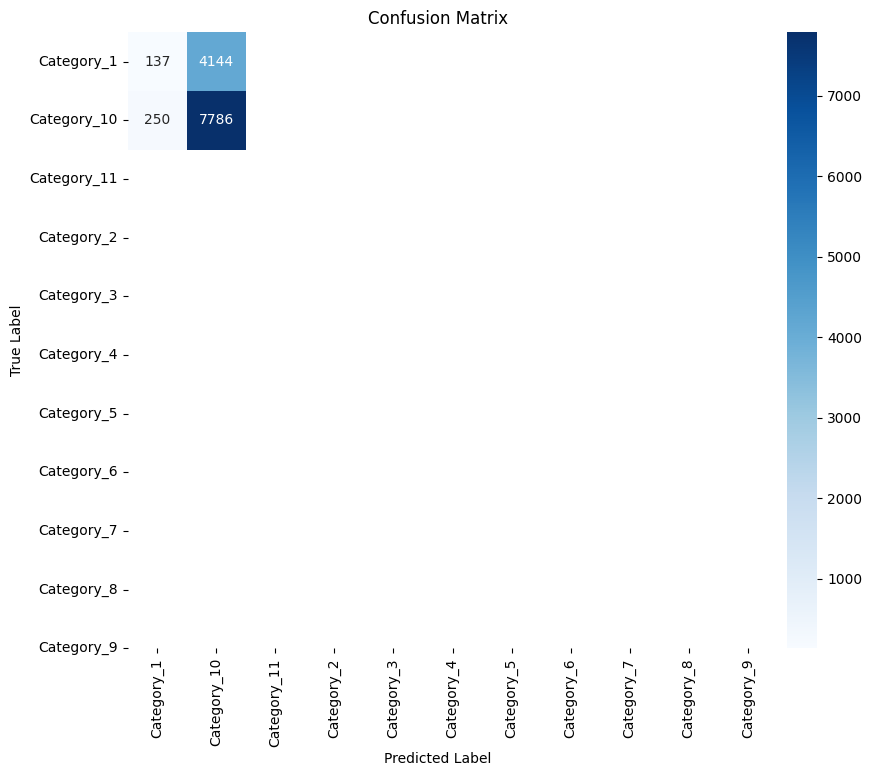

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a validation generator
val_labels = validation_generator.classes  # True labels from the validation generator
val_predictions = model.predict(validation_generator)  # Model predictions

# Convert predictions to class labels
val_predictions = np.argmax(val_predictions, axis=-1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
result #spiral

In [ ]:
result2 #irregular

In [ ]:
result3 #elliptical

<Figure size 640x480 with 0 Axes>

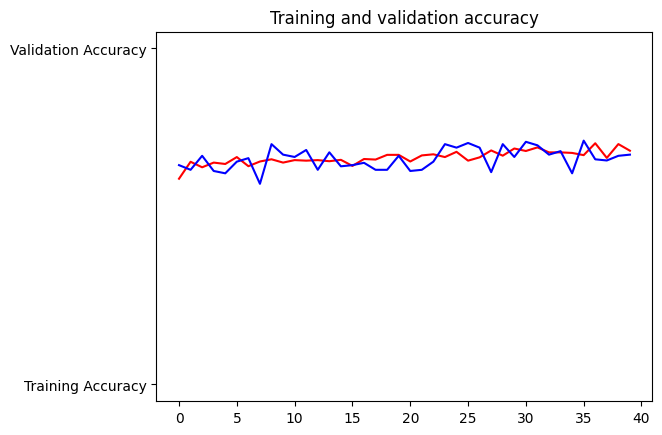

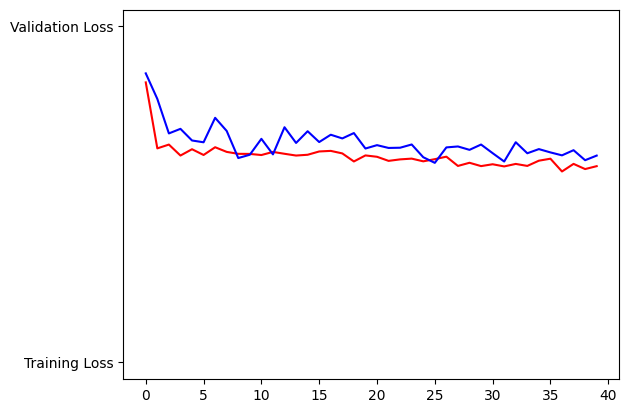

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()